## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

In [ ]:
!pip install pyccel==1.1.0

     |████████████████████████████████| 256kB 16.7MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 


## Pure python function

In [ ]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    
    un[:]=u[:]
   
    for i in range(nt):
      for j in range(1,nx-1):
        u[j]=un[j]+nu*dt/(dx**2)*(u[j+1]-2*u[j]+u[j-1])
      un[:]=u[:]
    
    
    return 0

## Numba accelerator

In [ ]:
#add the numba decorator to accelerate code
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    un[:]=u[:]
   
    for i in range(nt):
      for j in range(1,nx-1):
        u[j]=un[j]+nu*dt/(dx**2)*(u[j+1]-2*u[j]+u[j-1])
      un[:]=u[:]
    
    
    return 0

## Pyccel accelerator

In [ ]:
#add the pyccel decorator to accelerate code
@types('float[:]','float[:]','int','int','float','float','float')
def solve_1d_diff_pyccel(u, un, nt, nx, dt, dx, nu):
    un[:]=u[:]
    #fill the update of u
    for i in range(nt):
      for j in range(1,nx-1):
        u[j]=un[j]+nu*dt/(dx**2)*(u[j+1]-2*u[j]+u[j-1])
      un[:]=u[:]
    return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

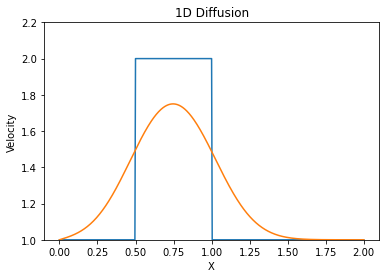

In [ ]:
nx = 501
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [ ]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

1 loop, best of 5: 1.14 s per loop


### Function with numba accelerator

In [ ]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

The slowest run took 139.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 5.09 ms per loop


### Function with pyccel accelerator

In [ ]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [ ]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

100 loops, best of 5: 5.26 ms per loop
